In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [21]:
hdata=pd.read_csv(r"C:/Users/Admin/Downloads/csv_result-phpmPOD5A.csv",header=0)
hdata_bk=hdata.copy()
hdata.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,target
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908,1
1,2,17183,1540,117961,118343,123125,118536,118536,308574,118539,1
2,3,36724,14457,118219,118220,117884,117879,267952,19721,117880,1
3,4,36135,5396,117961,118343,119993,118321,240983,290919,118322,1
4,5,42680,5905,117929,117930,119569,119323,123932,19793,119325,1


In [22]:
hdata.nunique()

id                  32769
RESOURCE             7518
MGR_ID               4243
ROLE_ROLLUP_1         128
ROLE_ROLLUP_2         177
ROLE_DEPTNAME         449
ROLE_TITLE            343
ROLE_FAMILY_DESC     2358
ROLE_FAMILY            67
ROLE_CODE             343
target                  2
dtype: int64

In [3]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
 10  target            32769 non-null  int64
dtypes: int64(11)
memory usage: 2.8 MB


In [4]:
hdata.isnull().sum()

id                  0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
target              0
dtype: int64

In [5]:
hdata.duplicated().sum()

0

In [6]:
del hdata['id']

In [7]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

hdata_count = hdata.target.value_counts()
print('Class 0:', hdata_count[0])
print('Class 1:', hdata_count[1])
print('Proportion:', round(hdata_count[0] / hdata_count[1], 2), ': 1')
print('Total CC Trans:', len(hdata))

Class 0: 1897
Class 1: 30872
Proportion: 0.06 : 1
Total CC Trans: 32769


In [8]:
#Identify the dependent and Target variables

IndepVar = [] 
for col in hdata.columns:
        if col!="target":
            IndepVar.append(col)

TargetVar = "target"
x=hdata[IndepVar]
y=hdata[TargetVar]

In [9]:
# split into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)

x_train.shape, x_test.shape, y_train.shape,y_test.shape

((22938, 9), (9831, 9), (22938,), (9831,))

In [10]:
col1=['RESOURCE','MGR_ID','ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_DEPTNAME','ROLE_TITLE',
      'ROLE_FAMILY_DESC','ROLE_FAMILY','ROLE_CODE']

In [11]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0,1))

x_train[col1] = mmscaler.fit_transform(x_train[col1])
x_train = pd.DataFrame(x_train)

x_test[col1] = mmscaler.fit_transform(x_test[col1])
x_test = pd.DataFrame(x_test)

In [12]:
# Load the result dataset

EMResults = pd.read_csv(r"C:/Users/Admin/Downloads/HTResults.csv", header=0)
EMResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[9274    0]
 [ 557    0]]
Outcome values : 
 9274 0 557 0
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      9274
           0       0.00      0.00      0.00       557

    accuracy                           0.94      9831
   macro avg       0.47      0.50      0.49      9831
weighted avg       0.89      0.94      0.92      9831

Accuracy : 94.3 %
Precision : 94.3 %
Recall : 100.0 %
F1 Score : 0.971
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


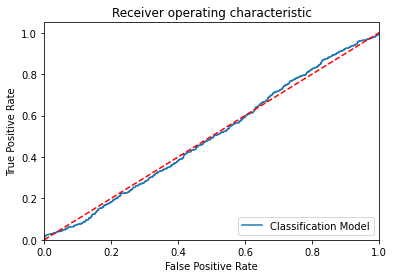

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[8381  893]
 [ 474   83]]
Outcome values : 
 8381 893 474 83
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.90      0.92      9274
           0       0.09      0.15      0.11       557

    accuracy                           0.86      9831
   macro avg       0.52      0.53      0.52      9831
weighted avg       0.90      0.86      0.88      9831

Accuracy : 86.1 %
Precision : 94.6 %
Recall : 90.4 %
F1 Score : 0.925
Specificity or True Negative Rate : 14.9 %
Balanced Accuracy : 52.6 %
MCC : 0.041
roc_auc_score: 0.526


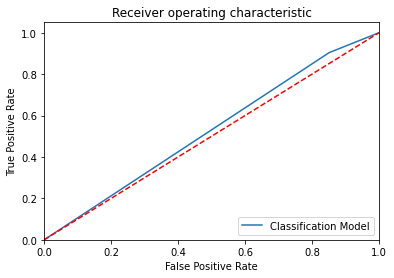

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[9262   12]
 [ 554    3]]
Outcome values : 
 9262 12 554 3
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      9274
           0       0.20      0.01      0.01       557

    accuracy                           0.94      9831
   macro avg       0.57      0.50      0.49      9831
weighted avg       0.90      0.94      0.92      9831

Accuracy : 94.2 %
Precision : 94.4 %
Recall : 99.9 %
F1 Score : 0.97
Specificity or True Negative Rate : 0.5 %
Balanced Accuracy : 50.2 %
MCC : 0.024
roc_auc_score: 0.502


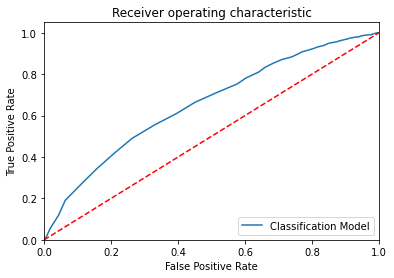

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[9257   17]
 [ 544   13]]
Outcome values : 
 9257 17 544 13
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      9274
           0       0.43      0.02      0.04       557

    accuracy                           0.94      9831
   macro avg       0.69      0.51      0.51      9831
weighted avg       0.92      0.94      0.92      9831

Accuracy : 94.3 %
Precision : 94.4 %
Recall : 99.8 %
F1 Score : 0.971
Specificity or True Negative Rate : 2.3 %
Balanced Accuracy : 51.0 %
MCC : 0.09
roc_auc_score: 0.511


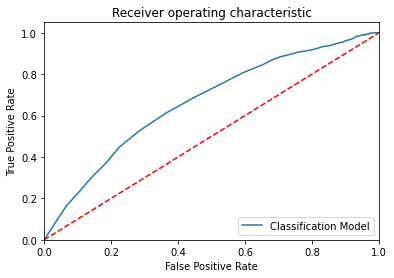

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[9150  124]
 [ 533   24]]
Outcome values : 
 9150 124 533 24
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.99      0.97      9274
           0       0.16      0.04      0.07       557

    accuracy                           0.93      9831
   macro avg       0.55      0.51      0.52      9831
weighted avg       0.90      0.93      0.91      9831

Accuracy : 93.3 %
Precision : 94.5 %
Recall : 98.7 %
F1 Score : 0.965
Specificity or True Negative Rate : 4.3 %
Balanced Accuracy : 51.5 %
MCC : 0.056
roc_auc_score: 0.515


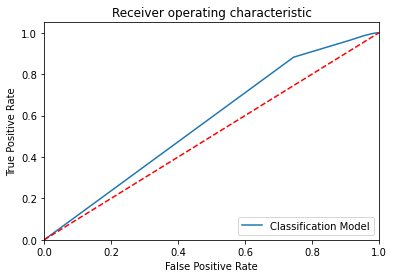

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[9274    0]
 [ 557    0]]
Outcome values : 
 9274 0 557 0
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      9274
           0       0.00      0.00      0.00       557

    accuracy                           0.94      9831
   macro avg       0.47      0.50      0.49      9831
weighted avg       0.89      0.94      0.92      9831

Accuracy : 94.3 %
Precision : 94.3 %
Recall : 100.0 %
F1 Score : 0.971
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


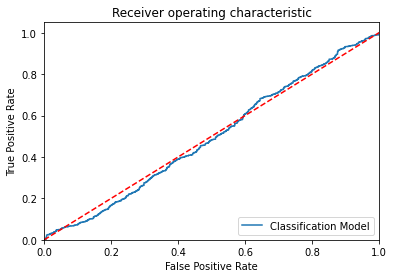

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[9213   61]
 [ 541   16]]
Outcome values : 
 9213 61 541 16
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.99      0.97      9274
           0       0.21      0.03      0.05       557

    accuracy                           0.94      9831
   macro avg       0.58      0.51      0.51      9831
weighted avg       0.90      0.94      0.92      9831

Accuracy : 93.9 %
Precision : 94.5 %
Recall : 99.3 %
F1 Score : 0.968
Specificity or True Negative Rate : 2.9 %
Balanced Accuracy : 51.1 %
MCC : 0.058
roc_auc_score: 0.511


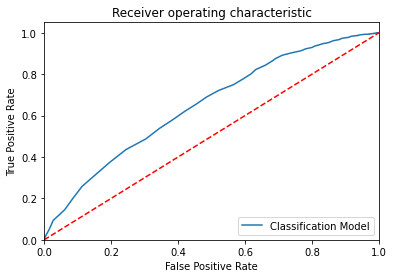

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[9259   15]
 [ 553    4]]
Outcome values : 
 9259 15 553 4
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      9274
           0       0.21      0.01      0.01       557

    accuracy                           0.94      9831
   macro avg       0.58      0.50      0.49      9831
weighted avg       0.90      0.94      0.92      9831

Accuracy : 94.2 %
Precision : 94.4 %
Recall : 99.8 %
F1 Score : 0.97
Specificity or True Negative Rate : 0.7 %
Balanced Accuracy : 50.2 %
MCC : 0.029
roc_auc_score: 0.503


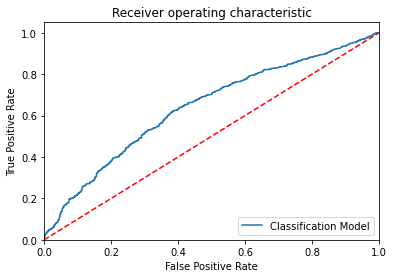

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[9274    0]
 [ 557    0]]
Outcome values : 
 9274 0 557 0
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      9274
           0       0.00      0.00      0.00       557

    accuracy                           0.94      9831
   macro avg       0.47      0.50      0.49      9831
weighted avg       0.89      0.94      0.92      9831

Accuracy : 94.3 %
Precision : 94.3 %
Recall : 100.0 %
F1 Score : 0.971
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


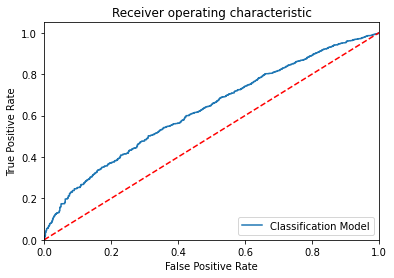

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 131 9143]
 [   2  555]]
Outcome values : 
 131 9143 2 555
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.01      0.03      9274
           0       0.06      1.00      0.11       557

    accuracy                           0.07      9831
   macro avg       0.52      0.51      0.07      9831
weighted avg       0.93      0.07      0.03      9831

Accuracy : 7.0 %
Precision : 98.5 %
Recall : 1.4 %
F1 Score : 0.028
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 50.5 %
MCC : 0.021
roc_auc_score: 0.505


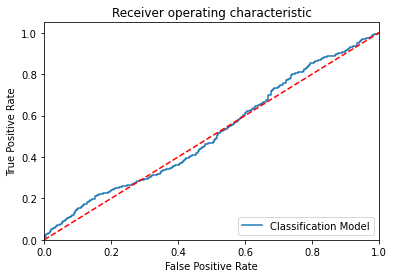

-----------------------------------------------------------------------------------------------------


In [13]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier()
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [14]:
# Results with comparing the all the algorithms 

#EMResults.to_csv("D://00 Henotic//SRKR//Datasets//Results//EMResults_22.csv")

EMResults.head(10)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),9274,0,557,0,0.943,0.943,1.000,0.971,0.000,NaN,0.500000,0.500
1,DecisionTreeClassifier(),8381,893,474,83,0.861,0.946,0.904,0.925,0.149,0.041,0.526361,0.526
2,"(DecisionTreeClassifier(max_features='auto', r...",9262,12,554,3,0.942,0.944,0.999,0.970,0.005,0.024,0.502046,0.502
3,"(ExtraTreeClassifier(random_state=2132338484),...",9257,17,544,13,0.943,0.944,0.998,0.971,0.023,0.090,0.510753,0.510
4,KNeighborsClassifier(),9150,124,533,24,0.933,0.945,0.987,0.965,0.043,0.056,0.514859,0.515
5,SVC(probability=True),9274,0,557,0,0.943,0.943,1.000,0.971,0.000,NaN,0.500000,0.500
6,(DecisionTreeClassifier(random_state=908139027...,9213,61,541,16,0.939,0.945,0.993,0.968,0.029,0.058,0.511074,0.511
7,([DecisionTreeRegressor(criterion='friedman_ms...,9259,15,553,4,0.942,0.944,0.998,0.970,0.007,0.029,0.502782,0.502
8,LGBMClassifier(),9274,0,557,0,0.943,0.943,1.000,0.971,0.000,NaN,0.500000,0.500
9,GaussianNB(),131,9143,2,555,0.070,0.985,0.014,0.028,0.996,0.021,0.505267,0.505


In [ ]:
# 1.extra trees
# 2.svc
#2.random forest
#3.
# hybrid parameter tuning for extra tress
# Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 1000, 10)]

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10, 14]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}

print(random_grid)

In [ ]:
# Create model object

ModelET = ExtraTreesClassifier()

ModelET_randomcv=RandomizedSearchCV(estimator=ModelET, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                                    random_state=100, n_jobs=-1)
### fit the randomized model

ModelET_randomcv.fit(x_train,y_train)

In [ ]:
# best or the optimal values of the parameters for which the model performed the best

ModelET_randomcv.best_params_

In [ ]:
# To build the 'ExtraTreesClassifier' model with random sampling with Hyperparameter tuning with RandomizedSearchCV

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=600, criterion='gini', max_depth=780, min_samples_split=5, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [ ]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

GS_grid = {'bootstrap': [True, False],
           'max_depth': [10,15],
           'max_features': [2, 3],
           'min_samples_leaf': [3, 4, 5,6],
           'min_samples_split': [3,4,5,6],
           'n_estimators': [1150, 1200, 1250, 1300,1350],
           'criterion':['entropy','gini']
           }

# Create object for model

ModelET = ExtraTreesClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelET, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

In [ ]:
# Best parameter from gridseachCV




Grid_search.best_params_

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
# Load the general dataset

HOutliers = pd.read_csv(r"C:/Users/Admin/Downloads/csv_result-phpmPOD5A.csv", header=0)
HOutliers.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,target
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908,1
1,2,17183,1540,117961,118343,123125,118536,118536,308574,118539,1
2,3,36724,14457,118219,118220,117884,117879,267952,19721,117880,1
3,4,36135,5396,117961,118343,119993,118321,240983,290919,118322,1
4,5,42680,5905,117929,117930,119569,119323,123932,19793,119325,1


In [4]:
# Display "Descriptive Statistical Analysis"

HOutliers.describe()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,target
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,16385.000000,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132,0.942110
std,9459.739822,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516,0.233539
min,1.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000,0.000000
25%,8193.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000,1.000000
50%,16385.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000,1.000000
75%,24577.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000,1.000000
max,32769.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000,1.000000


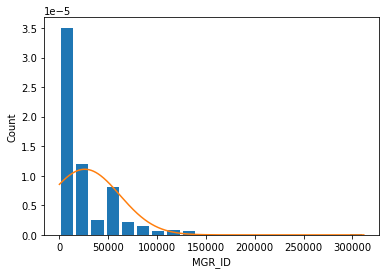

In [5]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(HOutliers.MGR_ID, bins=20, rwidth=0.8, density=True)

plt.xlabel('MGR_ID')
plt.ylabel('Count')

rng = np.arange(HOutliers.MGR_ID.min(), HOutliers.MGR_ID.max(), 0.1)
plt.plot(rng, norm.pdf(rng, HOutliers.MGR_ID.mean(),HOutliers.MGR_ID.std()))

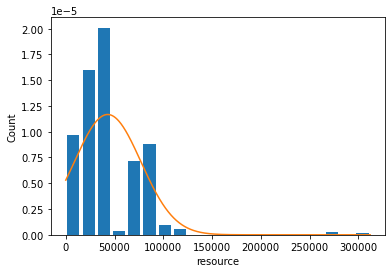

In [9]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(HOutliers.RESOURCE, bins=20, rwidth=0.8, density=True)

plt.xlabel('resource')
plt.ylabel('Count')

rng = np.arange(HOutliers.RESOURCE.min(), HOutliers.RESOURCE.max(), 0.1)
plt.plot(rng, norm.pdf(rng, HOutliers.RESOURCE.mean(),HOutliers.RESOURCE.std()))

<AxesSubplot:xlabel='target'>

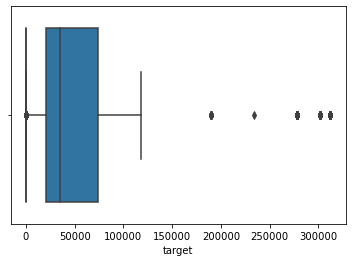

In [14]:
# Display the box plot to show the outliers

import seaborn as sns

sns.boxplot(x=HOutliers["RESOURCE"])

([<matplotlib.patches.Wedge at 0x2b81f5c1e20>,
  ...],
 [Text(1.0999999943044867, 0.00011193806019061416, ''),
  Text(1.0999999487403804, 0.0003358141759351537, ''),
  Text(1.0999998576121695, 0.0005596902777696269, ''),
  Text(1.099999720919858, 0.000783566356420657, ''),
  Text(1.0999995386634513, 0.001007442402614868, ''),
  Text(1.0999994304487146, 0.0011193804106427367, ''),
  Text(1.099999310842957, 0.0012313184070788853, ''),
  Text(1.099999037458385, 0.001455194360539336, ''),
  Text(1.099998718509746, 0.0016790702537228495, ''),
  Text(1.0999983539970535, 0.0019029460773560573, ''),
  Text(1.0999979439203225, 0.0021268218221655944, ''),
  Text(1.09999748827957, 0.0023506974788780987, ''),
  Text(1.0999969870748152, 0.0025745730382202114, ''),
  Text(1.0999964403060785, 0.002798448490918578, ''),
  Text(1.0999958479733825, 0.0030223238276998496, ''),
  Text(1.0999952100767518, 0.0032461990392906796, ''),
  Text(1.099994526616213, 0.003470074116417729, ''),
  Text(1.099993797591

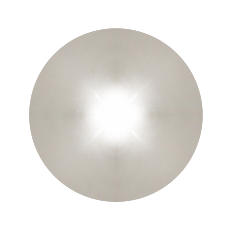

In [20]:
plt.pie(HOutliers.target)